# Softmax using tensorflow

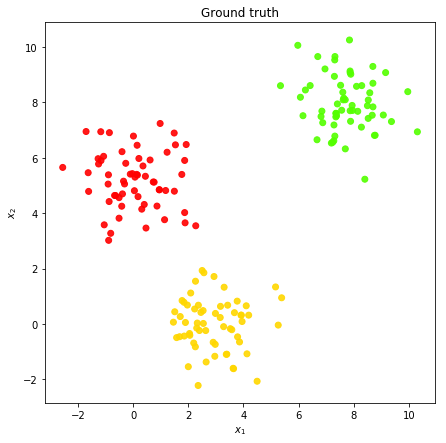

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
%matplotlib inline

np.random.seed(0)

from sklearn import datasets
n_samples = 180
data, labels = datasets.make_blobs(n_samples=n_samples, n_features=2, centers=[(0,5),(3,0),(8,8)], random_state=0)

plt.figure(figsize=(7,7))
plt.scatter(data[:,0], data[:,1], c=labels, cmap=cm.prism, alpha=0.9)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Ground truth')

#print data.shape
#print labels.shape

## One hot encoding of output labels

In [2]:
n_labels = 3
one_hot_encoded = np.zeros([len(labels), n_labels])
one_hot_encoded[np.arange(len(labels)), labels] = 1

In [3]:
import tensorflow as tf

learning_rate = 0.00001
training_epochs = 10000
batch_size = n_samples
display_step = 100

n_features = 2
n_labels = 3 # Recall that we need to do one-hot coding

X = tf.placeholder(tf.float32, [None, n_features]) # Input x1, x2
Y = tf.placeholder(tf.float32, [None, n_labels]) # Output labels

W = tf.Variable(tf.truncated_normal([n_features, n_labels]), name='weights') # w1, w2
b = tf.Variable(tf.truncated_normal([n_labels]), name='bias')   # bias

def model(X, W, b):
    return tf.nn.softmax(tf.matmul(X,W) + b)

y_model = model(X, W, b)
cost = - tf.reduce_sum( Y * tf.log(y_model) ) 

train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

predicted_class = tf.greater(y_model, 0.5)
correct = tf.equal(predicted_class, tf.cast(Y,'bool'))
accuracy = tf.reduce_mean( tf.cast(correct, 'float') )

In [4]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for epoch in range(training_epochs):
    overall_loss = 0.
    for i in range(0, n_samples, batch_size):
        batch_xs = data[i : min(i + batch_size, n_samples)]
        batch_ys = one_hot_encoded[i : min(i + batch_size, n_samples)]
        _, batch_loss = sess.run([train_op, cost], feed_dict={X:batch_xs, Y:batch_ys})
        overall_loss += (batch_loss / batch_size)
        
    if (epoch+1) % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "Loss=", "{:.9f}".format(overall_loss))

x_test = data
y_test = one_hot_encoded
a = sess.run([accuracy], feed_dict={X: x_test, Y: y_test})
print("Accuracy:", a)

W, b = sess.run([W, b])

('Epoch:', '0100', 'Loss=', '6.570895725')
('Epoch:', '0200', 'Loss=', '0.945179070')
('Epoch:', '0300', 'Loss=', '0.282665677')
('Epoch:', '0400', 'Loss=', '0.245397271')
('Epoch:', '0500', 'Loss=', '0.222598245')
('Epoch:', '0600', 'Loss=', '0.206564797')
('Epoch:', '0700', 'Loss=', '0.194460466')
('Epoch:', '0800', 'Loss=', '0.184766346')
('Epoch:', '0900', 'Loss=', '0.176644982')
('Epoch:', '1000', 'Loss=', '0.169625388')
('Epoch:', '1100', 'Loss=', '0.163429493')
('Epoch:', '1200', 'Loss=', '0.157881080')
('Epoch:', '1300', 'Loss=', '0.152860154')
('Epoch:', '1400', 'Loss=', '0.148279730')
('Epoch:', '1500', 'Loss=', '0.144073783')
('Epoch:', '1600', 'Loss=', '0.140190591')
('Epoch:', '1700', 'Loss=', '0.136588520')
('Epoch:', '1800', 'Loss=', '0.133233590')
('Epoch:', '1900', 'Loss=', '0.130097495')
('Epoch:', '2000', 'Loss=', '0.127156501')
('Epoch:', '2100', 'Loss=', '0.124390581')
('Epoch:', '2200', 'Loss=', '0.121782462')
('Epoch:', '2300', 'Loss=', '0.119317351')
('Epoch:', 